In [1]:
import requests
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd

In [2]:
r = requests.get('https://m.rbi.org.in/Scripts/PublicationsView.aspx?id=20105')
soup = BeautifulSoup(r.content, 'html.parser')
soup = BeautifulSoup(r.content, 'html.parser')
data = []
table = soup.find('table', attrs={'class':'lineItemsTable'})


rows = soup.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

In [3]:
data[6:41]

[['Andaman & Nicobar Islands', '-', '4.21', '37.13', '96.95'],
 ['Andhra Pradesh', '45.87', '625.80', '12372.41', '32757.63'],
 ['Arunachal Pradesh', '0.01', '7.03', '30.87', '937.48'],
 ['Assam', '11.09', '93.69', '1090.37', '6941.15'],
 ['Bihar', '31.79', '333.34', '2718.61', '8405.45'],
 ['Chandigarh', '3.33', '36.50', '505.61', '607.05'],
 ['Chhattisgarh', '.', '.', '1999.87', '3303.41'],
 ['Dadra & Nagar Haveli', '0.31', '12.26', '1190.06', '229.58'],
 ['Daman & Diu', '-', '7.94', '911.10', '1881.53'],
 ['Delhi', '52.68', '401.22', '6960.90', '10164.54'],
 ['Goa', '6.00', '74.17', '624.53', '3820.19'],
 ['Gujarat', '96.04', '887.40', '11030.37', '166753.60'],
 ['Haryana', '40.45', '355.90', '7988.63', '25998.80'],
 ['Himachal Pradesh', '3.16', '80.67', '720.06', '5599.25'],
 ['Jammu and Kashmir', '3.67', '113.31', '1283.26', '8475.28'],
 ['Jharkhand', '.', '.', '601.96', '5020.72'],
 ['Karnataka', '43.79', '660.85', '8430.23', '27161.11'],
 ['Kerala', '44.08', '387.51', '7021.14',

In [4]:
pov_df = pd.DataFrame(columns=['State_Name', 'Investment'])
dic={}
itr=6
lenn=len(data)
#for i in range(5)
while itr<42:
    
    lis=[]
    lis.append(data[itr][0].upper())
    try:
        lis.append(float(data[itr][4]))
        pov_df.loc[len(pov_df)]=lis
        dic[data[itr][0].upper()]=float(data[itr][4])
        print(data[itr][0],data[itr][4])
        
    except:
        lis.append(float(0))
        pov_df.loc[len(pov_df)]=lis
        dic[data[itr][0].upper()]=0
        print(data[itr][0],data[itr][4])
        
    itr+=1
pov_df.loc[28,"State_Name"]="ANDAMAN & NICOBAR ISLANDS"
pov_df.loc[9,"State_Name"]="JAMMU & KASHMIR"
pov_df.loc[31,"State_Name"]="NCT OF DELHI"
dic["NCT OF DELHI"]=dic["DELHI"]
dic["JAMMU & KASHMIR"]=dic["JAMMU AND KASHMIR"]

pov_df

Andaman & Nicobar Islands 96.95
Andhra Pradesh 32757.63
Arunachal Pradesh 937.48
Assam 6941.15
Bihar 8405.45
Chandigarh 607.05
Chhattisgarh 3303.41
Dadra & Nagar Haveli 229.58
Daman & Diu 1881.53
Delhi 10164.54
Goa 3820.19
Gujarat 166753.60
Haryana 25998.80
Himachal Pradesh 5599.25
Jammu and Kashmir 8475.28
Jharkhand 5020.72
Karnataka 27161.11
Kerala 44353.53
Lakshadweep 17.30
Madhya Pradesh 10530.40
Maharashtra 67941.24
Manipur 646.03
Meghalaya 468.55
Mizoram 403.14
Nagaland 1273.67
Odisha 12284.89
Puducherry 1135.29
Punjab 37126.69
Rajasthan 25452.90
Sikkim 72.16
Tamil Nadu 77824.34
Telangana .
Tripura 661.73
Uttar Pradesh 56161.03
Uttarakhand 6014.98
West Bengal 39433.22


,State_Name,Investment
0,ANDAMAN & NICOBAR ISLANDS,96.95
1,ANDHRA PRADESH,32757.63
2,ARUNACHAL PRADESH,937.48
3,ASSAM,6941.15
4,BIHAR,8405.45
5,CHANDIGARH,607.05
6,CHHATTISGARH,3303.41
7,DADRA & NAGAR HAVELI,229.58
8,DAMAN & DIU,1881.53
9,JAMMU & KASHMIR,10164.54


In [5]:
r = requests.get('https://m.rbi.org.in/Scripts/PublicationsView.aspx?id=19992')
soup = BeautifulSoup(r.content, 'html.parser')
data = []
table = soup.find('table', attrs={'class':'lineItemsTable'})


rows = soup.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])
dic_urbanpop={}
itr=6
lenn=len(data)
print(lenn)
#for i in range(5)
while itr<41:
    dic_urbanpop[data[itr][0].upper()]=float(data[itr][7])
    itr+=1
dic_urbanpop["NCT OF DELHI"]=dic_urbanpop["DELHI"]
dic_urbanpop["JAMMU & KASHMIR"]=dic_urbanpop["JAMMU AND KASHMIR"]
dic_urbanpop["DADRA & NAGAR HAVELI"]=dic_urbanpop["DADRA AND NAGAR HAVELI"]
dic_urbanpop["DAMAN & DIU"]=dic_urbanpop["DAMAN AND DIU"]
dic_urbanpop["ANDAMAN & NICOBAR ISLANDS"]=dic_urbanpop["ANDAMAN AND NICOBAR ISLANDS"]

43


In [6]:
r = requests.get('https://m.rbi.org.in/Scripts/PublicationsView.aspx?id=19991')
soup = BeautifulSoup(r.content, 'html.parser')
data = []
table = soup.find('table', attrs={'class':'lineItemsTable'})


rows = soup.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

dic_ruralpop={}
itr=6
lenn=len(data)
print(lenn)
#for i in range(5)
while itr<41:
    dic_ruralpop[data[itr][0].upper()]=float(data[itr][7])
    itr+=1
dic_ruralpop["NCT OF DELHI"]=dic_ruralpop["DELHI"]
dic_ruralpop["JAMMU & KASHMIR"]=dic_ruralpop["JAMMU AND KASHMIR"]
dic_ruralpop["DADRA & NAGAR HAVELI"]=dic_ruralpop["DADRA AND NAGAR HAVELI"]
dic_ruralpop["DAMAN & DIU"]=dic_ruralpop["DAMAN AND DIU"]
dic_ruralpop["ANDAMAN & NICOBAR ISLANDS"]=dic_ruralpop["ANDAMAN AND NICOBAR ISLANDS"]

43


In [7]:
dic_netpop={}
for key in dic_ruralpop.keys():
    dic_netpop[key]=dic_ruralpop[key]+dic_urbanpop[key]

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.read_gml("2011.gml")
G.remove_edges_from(nx.selfloop_edges(G))
bins=[]
temp=-25.5
while temp<26:
    bins.append(temp)
    temp+=1

dic1=dic
dic2=dic_netpop
y=0
count=0
x=[]
for u,v,a in G.edges(data=True):
    x+=[round((dic2[v]-dic1[u]),1)]*(a["weight"])
    count=count+a["weight"]
    y=round((dic2[v]-dic1[u]),1)*a["weight"]+y

In [33]:
print(x[0:40])


[1319.0, 1033.0, 1184.0, 1184.0, 2506.0, 2506.0, 2506.0, 991.0, 991.0, 991.0, 991.0, 991.0, 3609.0, 3609.0, 3609.0, 3609.0, 3609.0, 3609.0, 3609.0, 3609.0, 60376.0, 60376.0, 60376.0, 60376.0, 60376.0, 60376.0, 60376.0, 60376.0, 41911.0, 41911.0, 41911.0, 41911.0, 41911.0, 41911.0, 41911.0, 41911.0, 41911.0, 41911.0, 41911.0, 41911.0]


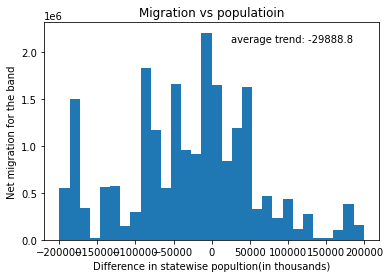

In [37]:
m=plt.hist(x, bins=30, histtype='bar', )
strr="average trend: "+str(round((y/count),1))
plt.text(25000, 21.0*1e5, strr)
fig=plt.gcf()
plt.title("Migration vs populatioin")
plt.xlabel("Difference in statewise popultion(in thousands)")
plt.ylabel("Net migration for the band")
fig.savefig("populationT_T")
plt.show()











In [25]:
y/count

-64515.72974719283

In [13]:
1e6*2

2000000.0